In [1]:
#Importing Libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

### 1. Dataset Import

In [31]:
#Reading Dataset
df = pd.read_csv('data.csv')

### 2. Dataset Understanding

In [32]:
#Data understanding
print(df.describe().T)

                         count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.902779e-02  7.947853e-02     0.000692   
concave points_mean      569.0  4.914762e-02  3.854224e-02     0.001852   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               

In [68]:
print(df.shape)

(569, 32)


In [33]:
print(df.isnull().sum())
#df = df.dropna()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


### 3. Data pre-processing and Exploratory Data Analysis (EDA)

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

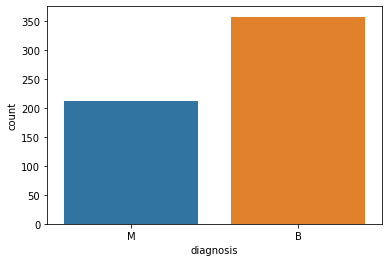

In [35]:
#Understand the data 
sns.countplot(x="diagnosis", data=df) #M - malignant   B - benign

In [36]:
####### Replace categorical values with numbers########
print("Distribution of data: ", df['diagnosis'].value_counts())

#Define the dependent variable that needs to be predicted (labels)
y = df["diagnosis"].values
print("diagnosis before encoding are: ", np.unique(y))

# Encoding categorical data from text (B and M) to integers (0 and 1)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M=1 and B=0
print("diagnosis after encoding are: ", np.unique(Y))

Distribution of data:  B    357
M    212
Name: diagnosis, dtype: int64
diagnosis before encoding are:  ['B' 'M']
diagnosis after encoding are:  [0 1]


In [37]:
#Define x and normalize / scale values

#Define the independent variables. Drop label and ID, and normalize other data
X = df.drop(labels = ["diagnosis", "id"], axis=1) 
print(X.describe().T) #Needs scaling

                         count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.089028    0.079479    0.000692   
concave points_mean      569.0    0.049148    0.038542    0.001852   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se             

In [38]:
#Scale / normalize the values to bring them to similar range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)  #Scaled values

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


### 4. Dataset splitting into train and test set

In [39]:
#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("Shape of training data is: ", X_train.shape)
print("Shape of testing data is: ", X_test.shape)

Shape of training data is:  (426, 30)
Shape of testing data is:  (143, 30)


### 5. Model Building

In [40]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [43]:
model = Sequential()
model.add(Dense(16, input_dim=30, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                496       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
 activation_5 (Activation)   (None, 1)                 0         
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________
None


### 6. Fitting and Evaluating the Model

In [44]:
#Fit with no early stopping or other callbacks
history = model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/100
7/7 [==============================] - 1s 26ms/step - loss: 0.7008 - accuracy: 0.5892 - val_loss: 0.6771 - val_accuracy: 0.6224
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 0.6790 - accuracy: 0.6408 - val_loss: 0.6605 - val_accuracy: 0.6224
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6624 - accuracy: 0.6714 - val_loss: 0.6441 - val_accuracy: 0.6573
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6547 - accuracy: 0.6972 - val_loss: 0.6284 - val_accuracy: 0.7203
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6405 - accuracy: 0.7324 - val_loss: 0.6138 - val_accuracy: 0.7902
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6274 - accuracy: 0.7394 - val_loss: 0.6000 - val_accuracy: 0.8601
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6048 - accuracy: 0.8005 - val_loss: 0.5867 - val_accuracy: 0.8601
Epoch 8/100
7/7 [=========

### 7. Model Interpretation

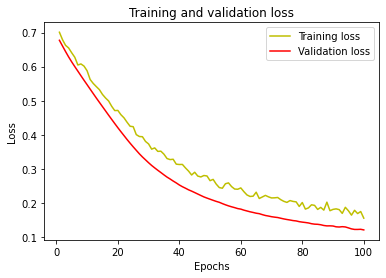

In [45]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

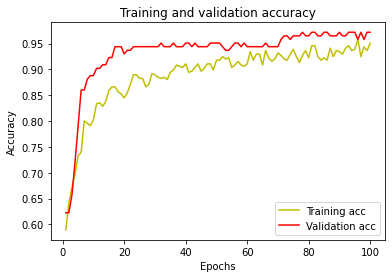

In [46]:
acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

5/5 [==============================] - 0s 3ms/step


<AxesSubplot:>

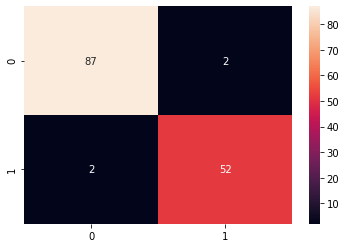

In [47]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

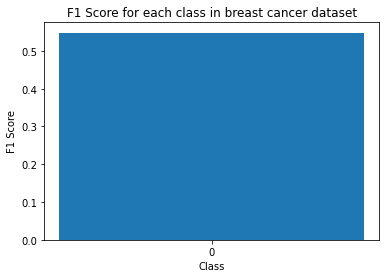

In [61]:
from sklearn.metrics import f1_score
predicted_labels = np.ones_like(y_test) * 1
f1_per_class = f1_score(y_test, predicted_labels, average=None)
class_labels = [str(i) for i in range(1)]
plt.bar(class_labels, f1_per_class)
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('F1 Score for each class in breast cancer dataset')
plt.show()

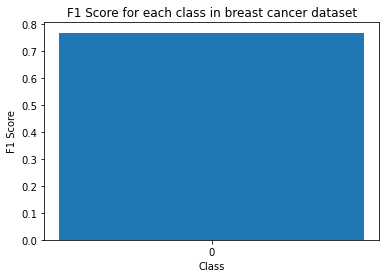

In [62]:
from sklearn.metrics import f1_score
predicted_labels = np.ones_like(y_test) * 0
f1_per_class = f1_score(y_test, predicted_labels, average=None)
class_labels = [str(i) for i in range(1)]
plt.bar(class_labels, f1_per_class)
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('F1 Score for each class in breast cancer dataset')
plt.show()

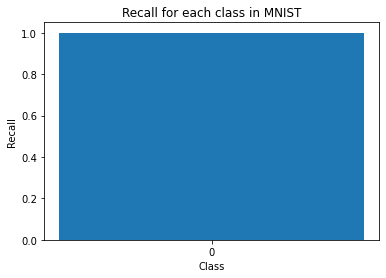

In [63]:
from sklearn.metrics import recall_score
predicted_labels = np.ones_like(y_test) * 0
recall_per_class = recall_score(y_test, predicted_labels, average=None)
class_labels = [str(i) for i in range(1)]
plt.bar(class_labels, recall_per_class)
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Recall for each class in MNIST')
plt.show()

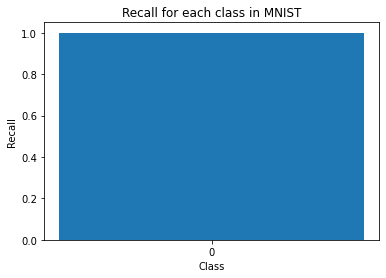

In [64]:
from sklearn.metrics import recall_score
predicted_labels = np.ones_like(y_test) * 1
recall_per_class = recall_score(y_test, predicted_labels, average=None)
class_labels = [str(i) for i in range(1)]
plt.bar(class_labels, recall_per_class)
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Recall for each class in MNIST')
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


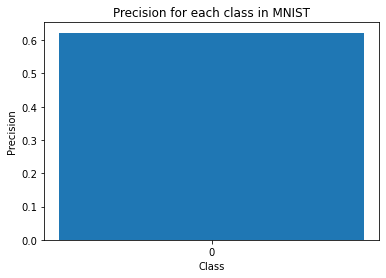

In [65]:
from sklearn.metrics import precision_score
predicted_labels = np.ones_like(y_test) * 0
precision_per_class = precision_score(y_test, predicted_labels, average=None)
class_labels = [str(i) for i in range(1)]
plt.bar(class_labels, precision_per_class)
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision for each class in MNIST')
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


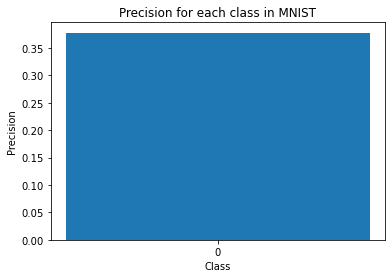

In [66]:
from sklearn.metrics import precision_score
predicted_labels = np.ones_like(y_test) * 1
precision_per_class = precision_score(y_test, predicted_labels, average=None)
class_labels = [str(i) for i in range(1)]
plt.bar(class_labels, precision_per_class)
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision for each class in MNIST')
plt.show()

### Model Interpretation Overview:

- Model Building summary : Total Trainable parameters are 513. The term "total trainable parameters" refers to the number of learnable weights and biases in the model that are updated during the training process to minimize the loss function and improve the model's performance.


- Train accuracy=0.9507, test accuracy = 0.9720. In this case, the value of 0.9507 indicates that the model correctly predicts the class of approximately 95.07% of the samples in the training dataset. The value of 0.9507 indicates that the model correctly predicts the class of approximately 95.07% of the samples in the training dataset.


- Training Loss:Training loss is a metric that represents how well the model is fitting the training data. During training, the model's parameters (weights and biases) are adjusted to minimize this loss. The training loss ideally should decrease as the model learns from the data and improves its ability to make accurate predictions on the training set. A decreasing training loss indicates that the model is learning from the data and making progress in minimizing prediction errors on the training set. Validation Loss: Validation loss is a metric that represents how well the model generalizes to new, unseen data.As training progresses, the training loss is continuing to decrease, but the validation loss starts to level off. This is because the model is becoming overly specialized to the training data (overfitting), and its ability to generalize to new data decreases.


- In the context of a heat map used for binary classification, the numbers associated with each class (class 0 and class 1) represent the counts or occurrences of those classes in a specific context i.e., class 0 is Benign and class 1 is Malignant. In this confusion matrix, the number 87 represents the count of true negatives (TN), which are the samples that were correctly predicted as "Benign" (Class 0). The number 52 represents the count of true positives (TP), which are the samples that were correctly predicted as "Malignant" (Class 1).


- For class 1 precision score is 0.4 which indicates that out of all the instances that the model predicted as belonging to class label 1, approximately 40% of them were actually true positives (correctly predicted). For class 0 precision score is 0.62 which indicates that out of all the instances that the model predicted as belonging to class label 0, approximately 62% of them were actually true positives (correctly predicted).


- The recall score for both class 1 and class 0 is 1, it means that the model is correctly identifying all positive instances (class 1) and all negative instances (class 0) in the dataset. In other words, the model is not making any false negative predictions for class 1 (no actual class 1 is being wrongly classified as class 0), and it is not making any false positive predictions for class 0 (no actual class 0 is being wrongly classified as class 1).


- The F1 score for class 0 (often referred to as the "negative class") being 0.78 means that the model has achieved a reasonably good balance between precision and recall for class 0 predictions.The F1 score for class 1 (often referred to as the "positive class") being 0.57 suggests that the model's performance on class 1 predictions is relatively lower compared to class 0.